# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | malango
Processing Record 2 of Set 1 | hamilton
Processing Record 3 of Set 1 | sept-iles
Processing Record 4 of Set 1 | lebu
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | bilibino
Processing Record 7 of Set 1 | vyazemskiy
Processing Record 8 of Set 1 | kirkuk
Processing Record 9 of Set 1 | machico
Processing Record 10 of Set 1 | childress
Processing Record 11 of Set 1 | hawaiian paradise park
Processing Record 12 of Set 1 | borogontsy
Processing Record 13 of Set 1 | afaahiti
Processing Record 14 of Set 1 | west island
Processing Record 15 of Set 1 | stanley
Processing Record 16 of Set 1 | san patricio
Processing Record 17 of Set 1 | coahuayana de hidalgo
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | invercargill
Processing Record 21 of Set 1 | utrik
Processing Record 22 of Set 1 | chinchilla
Pro

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = city_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,malango,-2.9627,119.9001,19.76,93,98,0.49,ID,1726612340
1,hamilton,39.1834,-84.5333,28.97,40,100,4.12,US,1726612126
2,sept-iles,50.2001,-66.3821,21.29,69,75,1.54,CA,1726612342
3,lebu,-37.6167,-73.6500,9.86,80,99,3.39,CL,1726612303
4,port-aux-francais,-49.3500,70.2167,5.31,96,100,17.11,TF,1726612344


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,malango,-2.9627,119.9001,19.76,93,98,0.49,ID,1726612340
1,hamilton,39.1834,-84.5333,28.97,40,100,4.12,US,1726612126
2,sept-iles,50.2001,-66.3821,21.29,69,75,1.54,CA,1726612342
3,lebu,-37.6167,-73.6500,9.86,80,99,3.39,CL,1726612303
4,port-aux-francais,-49.3500,70.2167,5.31,96,100,17.11,TF,1726612344


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

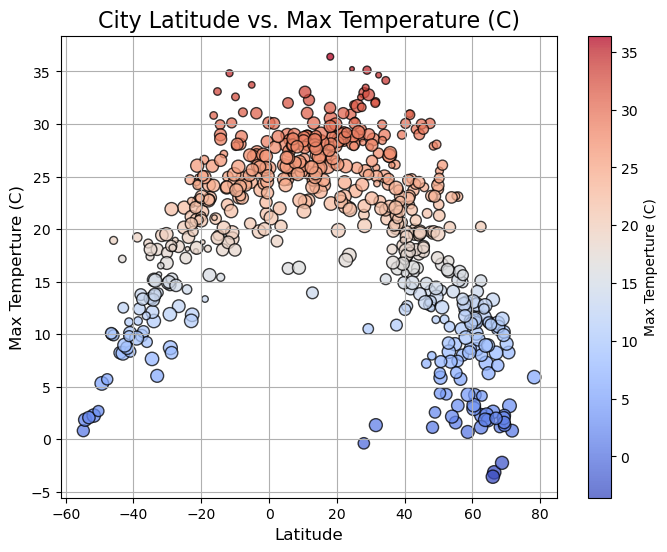

In [10]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8,6))
plt.scatter(city_df['Lat'], city_df['Max Temp'],
            c=city_df['Max Temp'],  
            cmap='coolwarm',  
            edgecolors='black',  
            s=city_df['Humidity'],  
            alpha=0.75 
            )
plt.title('City Latitude vs. Max Temperature (C)', fontsize=16)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Max Temperture (C)', fontsize=12)
cbar = plt.colorbar()
cbar.set_label('Max Temperture (C)')
# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

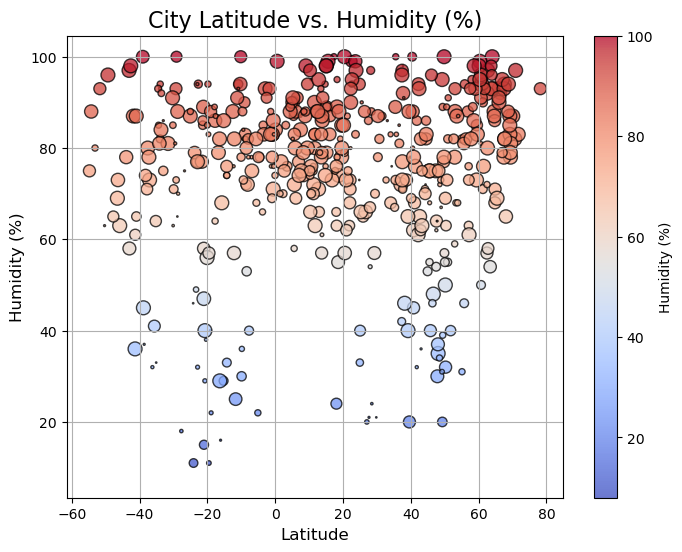

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8,6))
plt.scatter(city_df['Lat'], city_df['Humidity'],
            c=city_df['Humidity'],  
            cmap='coolwarm',  
            edgecolors='black',  
            s=city_df['Cloudiness'],  
            alpha=0.75 
            )
plt.title('City Latitude vs. Humidity (%)', fontsize=16)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Humidity (%)', fontsize=12)
cbar = plt.colorbar()
cbar.set_label('Humidity (%)')
# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

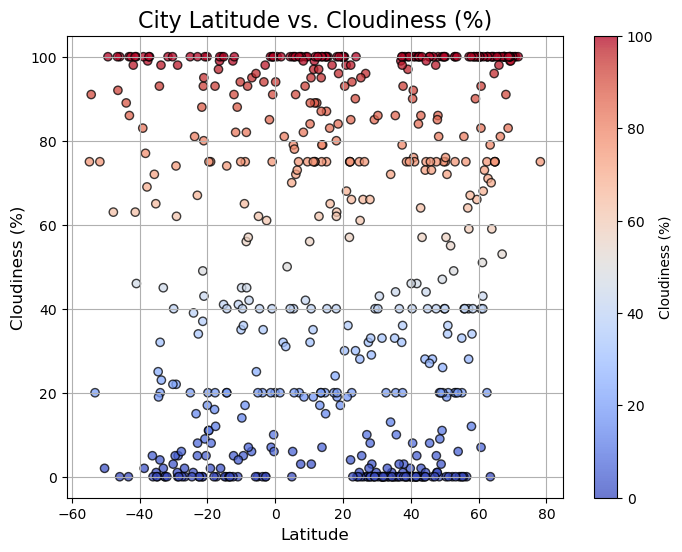

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8,6))
plt.scatter(city_df['Lat'], city_df['Cloudiness'],
            c=city_df['Cloudiness'],  
            cmap='coolwarm',  
            edgecolors='black',    
            alpha=0.75 
            )
plt.title('City Latitude vs. Cloudiness (%)', fontsize=16)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Cloudiness (%)', fontsize=12)
cbar = plt.colorbar()
cbar.set_label('Cloudiness (%)')

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [14]:
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,malango,-2.9627,119.9001,19.76,93,98,0.49,ID,1726612340
1,hamilton,39.1834,-84.5333,28.97,40,100,4.12,US,1726612126
2,sept-iles,50.2001,-66.3821,21.29,69,75,1.54,CA,1726612342
3,lebu,-37.6167,-73.6500,9.86,80,99,3.39,CL,1726612303
4,port-aux-francais,-49.3500,70.2167,5.31,96,100,17.11,TF,1726612344


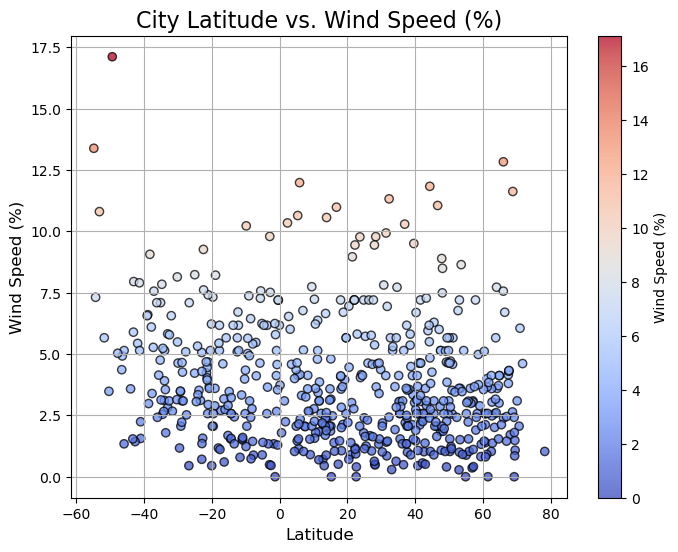

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8,6))
plt.scatter(city_df['Lat'], city_df['Wind Speed'],
            c=city_df['Wind Speed'],  
            cmap='coolwarm',  
            edgecolors='black',    
            alpha=0.75 
            )
plt.title('City Latitude vs. Wind Speed (%)', fontsize=16)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Wind Speed (%)', fontsize=12)
cbar = plt.colorbar()
cbar.set_label('Wind Speed (%)')

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_data, y_data, x_label, y_label, title):
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)

    regression_line = slope * np.array(x_data) + intercept

    plt.figure(figsize=(10,6))
    plt.scatter(x_data, y_data, edgecolors='black', color='skyblue', s=60, alpha=0.7, label='Data Points')

    plt.plot(x_data, regression_line, color='red', label=f'Linear Fit: y={slope:.2f}x+{intercept:.2f}')

    plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)

    plt.legend()
    plt.grid(True)

    plt.text(min(x_data), max(y_data), f'R-squared: {r_value**2:.2f}', fontsize=12, color='red')

    plt.show()


In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_df[city_df['Lat'] >= 0].copy()

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,hamilton,39.1834,-84.5333,28.97,40,100,4.12,US,1726612126
2,sept-iles,50.2001,-66.3821,21.29,69,75,1.54,CA,1726612342
5,bilibino,68.0546,166.4372,1.15,65,91,1.71,RU,1726612345
6,vyazemskiy,47.5378,134.7525,14.13,62,5,1.85,RU,1726612346
7,kirkuk,35.4681,44.3922,27.04,33,0,3.06,IQ,1726612347


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_df[city_df['Lat'] <= 0].copy()


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,malango,-2.9627,119.9001,19.76,93,98,0.49,ID,1726612340
3,lebu,-37.6167,-73.6500,9.86,80,99,3.39,CL,1726612303
4,port-aux-francais,-49.3500,70.2167,5.31,96,100,17.11,TF,1726612344
12,afaahiti,-17.7500,-149.2833,24.20,86,93,5.14,PF,1726612353
13,west island,-12.1568,96.8225,24.99,57,91,6.17,CC,1726612354


###  Temperature vs. Latitude Linear Regression Plot

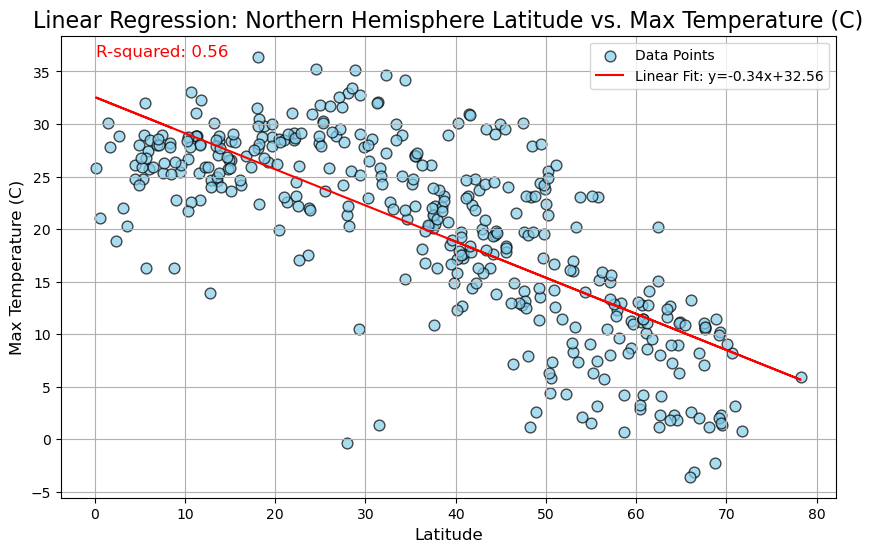

In [21]:
# Linear regression on Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df['Lat'],      
    northern_hemi_df['Max Temp'],
    x_label='Latitude',
    y_label='Max Temperature (C)',
    title='Linear Regression: Northern Hemisphere Latitude vs. Max Temperature (C)'
)


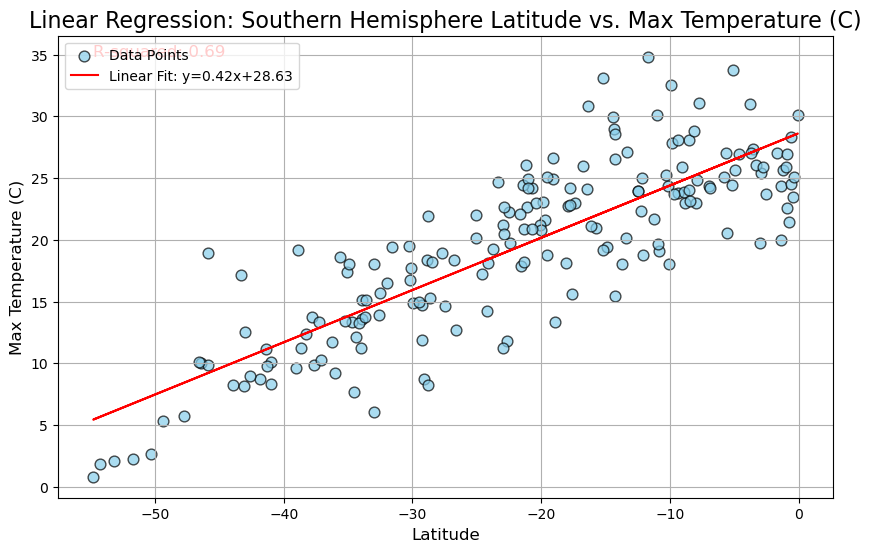

In [22]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df['Lat'],      
    southern_hemi_df['Max Temp'], 
    x_label='Latitude',
    y_label='Max Temperature (C)',
    title='Linear Regression: Southern Hemisphere Latitude vs. Max Temperature (C)'
)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

The graph shows that the further you are for latitude 0 (the Equator) the lower the temperature.

### Humidity vs. Latitude Linear Regression Plot

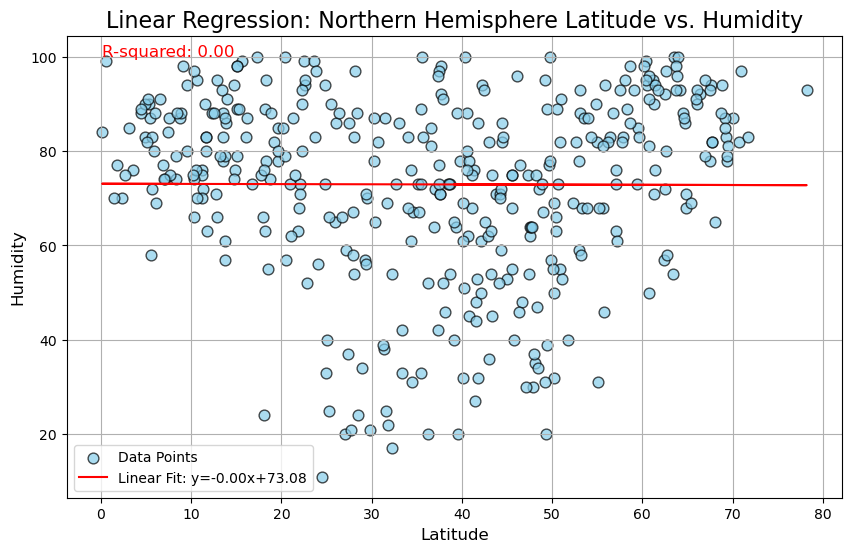

In [30]:
# Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df['Lat'],      
    northern_hemi_df['Humidity'], 
    x_label='Latitude',
    y_label='Humidity',
    title='Linear Regression: Northern Hemisphere Latitude vs. Humidity'
)


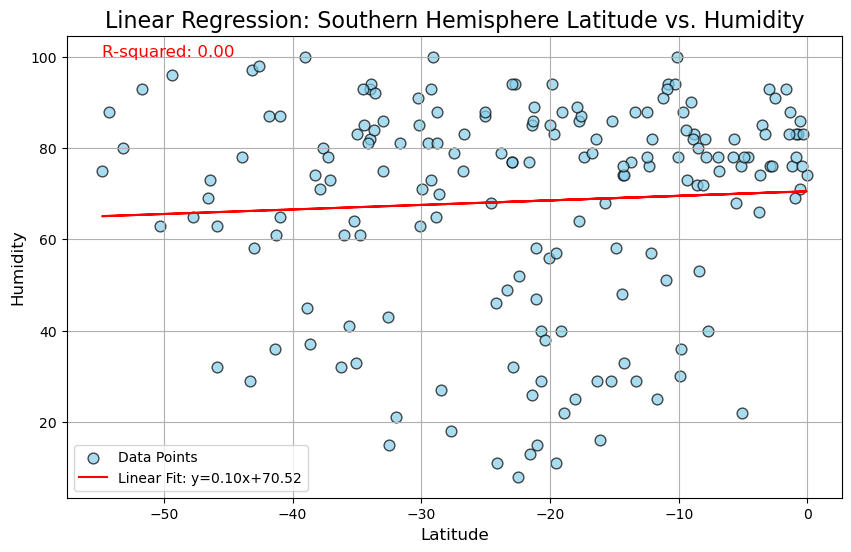

In [29]:
# Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df['Lat'],      
    southern_hemi_df['Humidity'], 
    x_label='Latitude',
    y_label='Humidity',
    title='Linear Regression: Southern Hemisphere Latitude vs. Humidity'
)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

Unlike the temperature graph the humidity doesn't change much the further you get from latitude 0.
This would show that the humidity is effected more by other variables.

### Cloudiness vs. Latitude Linear Regression Plot

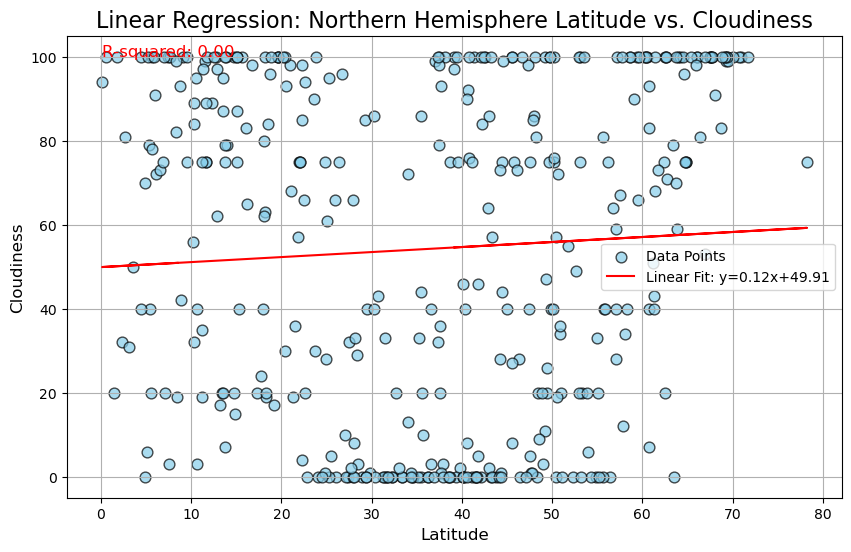

In [25]:
# Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df['Lat'],      
    northern_hemi_df['Cloudiness'], 
    x_label='Latitude',
    y_label='Cloudiness',
    title='Linear Regression: Northern Hemisphere Latitude vs. Cloudiness'
)


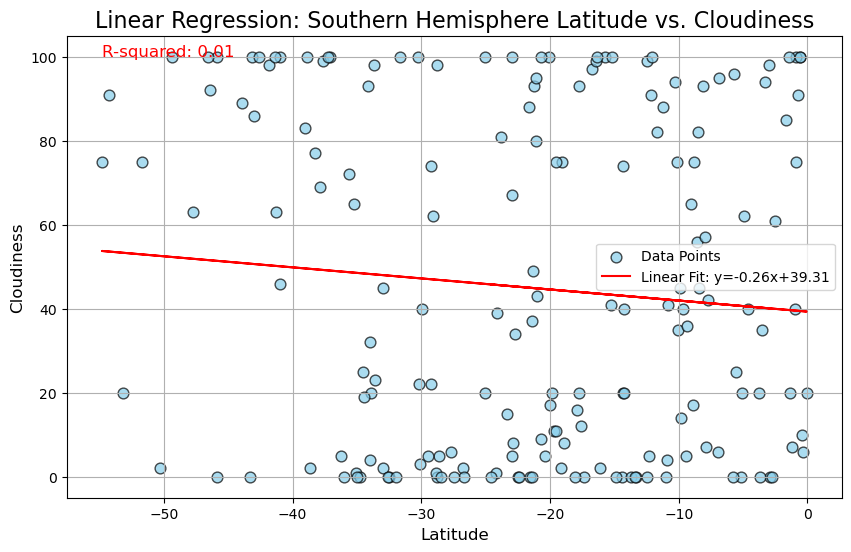

In [26]:
# Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df['Lat'],      
    southern_hemi_df['Cloudiness'], 
    x_label='Latitude',
    y_label='Cloudiness',
    title='Linear Regression: Southern Hemisphere Latitude vs. Cloudiness'
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

These graph show that the opposite is true for the cloudiness compared to the temperature, the further you get the cloudier the area gets.

### Wind Speed vs. Latitude Linear Regression Plot

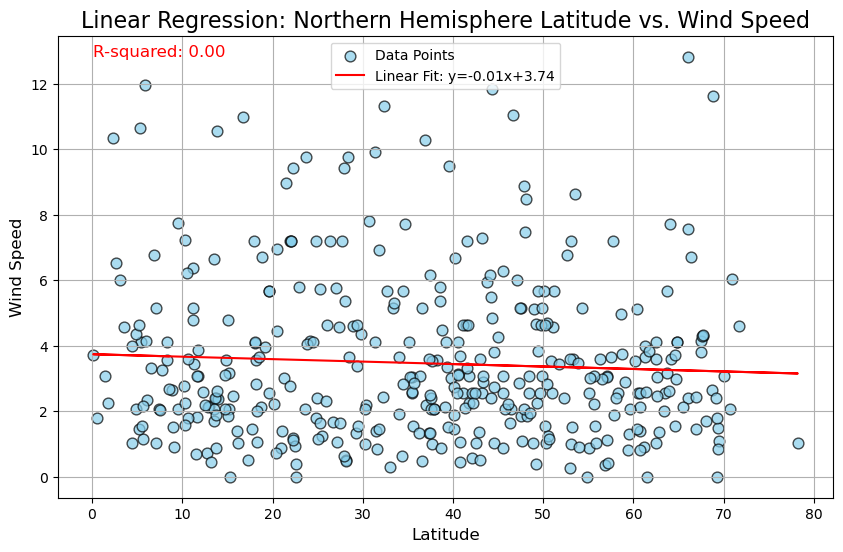

In [27]:
# Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df['Lat'],      
    northern_hemi_df['Wind Speed'], 
    x_label='Latitude',
    y_label='Wind Speed',
    title='Linear Regression: Northern Hemisphere Latitude vs. Wind Speed'
)

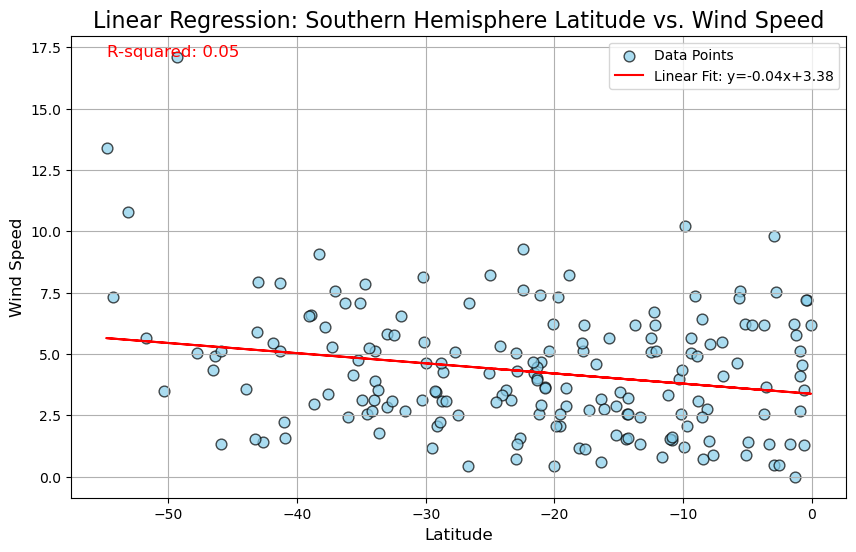

In [28]:
# Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df['Lat'],      
    southern_hemi_df['Wind Speed'], 
    x_label='Latitude',
    y_label='Wind Speed',
    title='Linear Regression: Southern Hemisphere Latitude vs. Wind Speed'
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The 2 graphs show conflicting info meaning there are probably more variables that are effecting the results.